# Residuum und Fehler

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Sie erhalten eindimensionale Daten in einem pandas DataFrame mit den Spalten `'x'` und `'y'` und ein Modell, welches aus den Einträgen $x_i$ der Spalte `'x'` Vorhersagen $\hat{y}_i$ generiert.

`(A)` Schreiben Sie eine Funktion, die für dieses Modell und diese Daten das Residuum, die absoluten, und die quadratischen Fehler der einzelnen Datenpunkte berechnet. Die Funktion soll den übergebenen DataFrame mit den zusätzlichen Spalten `prediction`, `residual`, `absolute_error` und `squared_error` zurückgeben.

In [46]:
def residuum(df: pd.DataFrame, model: callable) -> pd.DataFrame:
    df['prediction'] = df['x'].transform(model)
    df['residual'] = df['y'] - df['prediction']
    df['absolute_error'] = df['residual'].abs()
    df['squared_error'] = df['residual'].transform(np.square)
    
    return df

    

Nun erhalten Sie Messdaten (`data`) und ein Modell (`model`):

In [47]:
data = pd.DataFrame({'x': np.random.rand(50), 'y': np.random.rand(50)})

def model(a_0: float, a_1: float) -> callable:
    return lambda x: a_0 + a_1 * x

`(R)` Um was für eine Art von Modell handelt es sich (Typ und Bezeichnung)? Berechnen Sie mithilfe Ihrer Funktion das Residuum sowie den mittleren absoluten und mittleren quadratischen Fehler des Modells für verschiedene Werte der freien Parameter.

Regression, Deterministisch, Kontinuierlich

In [48]:
a_0, a_1 = 1, 2

errors = residuum(data, model(a_0, a_1))

residual = errors['residual']
print(f"mean absolute error: {errors['absolute_error'].mean()}")
print(f"mean squared error: {errors['squared_error'].mean()}")

mean absolute error: 1.5374167764084996
mean squared error: 2.819251097225754


`(A)` Stellen Sie die Daten, das Modell, sowie das Residuum grafisch dar.

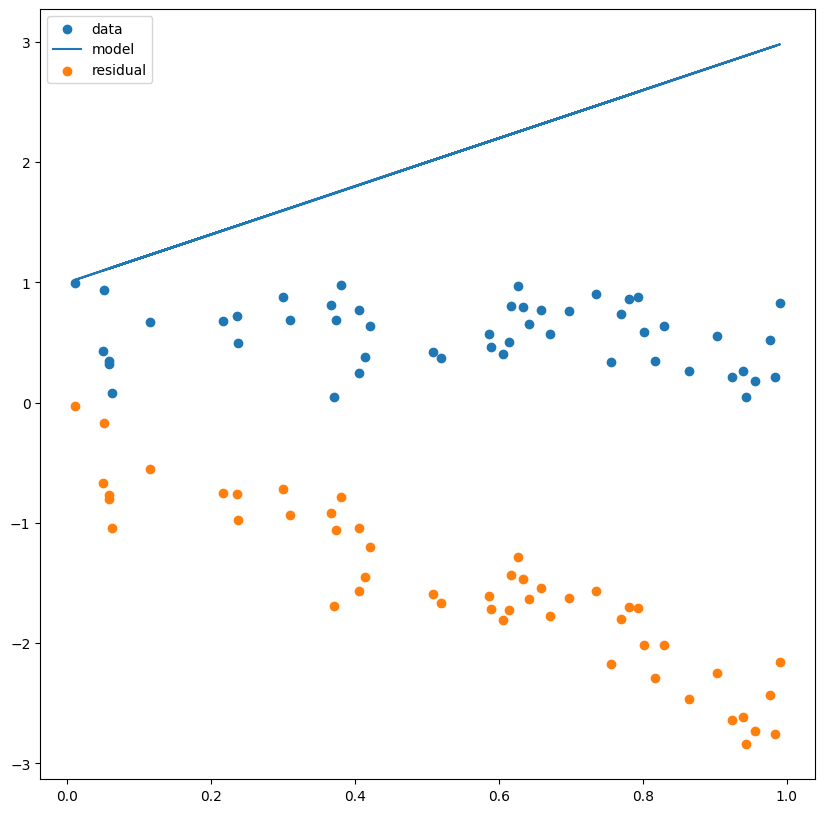

In [49]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(data['x'], data['y'], label='data')
ax.plot(data['x'], data['prediction'], label='model')
ax.scatter(data['x'], data['residual'], label='residual')
ax.legend()